This notebook is created in for the Youtube Channel Video.

Channel Link:https://bit.ly/2NdLnbg

Video Link:https://youtu.be/ZtMz0bFTdXg


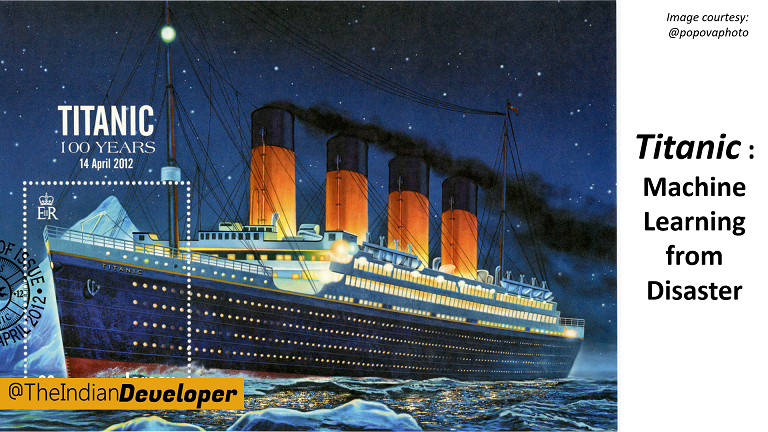

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

### Read the Data, describe rows and columns

In [ ]:
train_df  = pd.read_csv("/kaggle/input/titanic/train.csv")
print ("*"*10, "Dataset information", "*"*10)
print (train_df.info())

In [ ]:
print ("*"*10, "First 5 Train File Rows", "*"*10)
train_df.head(5)

In [ ]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
print(test_df.info())

In [ ]:
train_df.info()

In [ ]:
train_df.Cabin.value_counts()

### Deleting features that we are not using for the BASELINE

In [ ]:
train_df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], inplace= True, axis = 1)
test_df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], inplace= True, axis = 1)

In [ ]:
print(train_df.info(), test_df.info())

### Identify Features with NULL values, Fix the NULL values

Null values for:
* Train_df = Embarked

In [ ]:
train_df.Embarked.value_counts()

In [ ]:
#Embarked null fix
data = [train_df, test_df]

for dataset in data:
    dataset.Embarked = dataset.Embarked.fillna('S')

### Identify columns with datatype other than int or float

In [ ]:
train_df.info()

In [ ]:
train_df['Sex'].value_counts()

In [ ]:
genderMap = {"male": 0, "female": 1}
data = [train_df, test_df] 

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genderMap)

In [ ]:
train_df['Embarked'].value_counts()

In [ ]:
embarkedMap = {"S": 0, "C": 1, "Q":2}
data = [train_df, test_df] 

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarkedMap)

In [ ]:
print(train_df.info(), test_df.info())

### Separating X's and Y's i.e. features and labels

In [ ]:
X_train = train_df.drop(['Survived', 'PassengerId'], axis=1)
Y_train = train_df['Survived']

In [ ]:
X_test = test_df.drop("PassengerId", axis=1)

### Select a model and train it.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 0) 
clf.fit(X_train, Y_train)

Y_pred  = clf.predict(X_test)

In [ ]:
print(Y_pred)

### Model Evaluation

In [ ]:
acc_logistic = round(clf.score(X_train, Y_train)*100, 2)

print (acc_logistic)

### Score submission for the Baseline

In [ ]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

If you have reached till here, share your experience in the comments section. Also, if you like the notebook please upvote for it.

Next, I will be creating an intermediate version of this where we will add few features, do some data cleaning and feature engineering. Also, I will show how to use few other models and see compare the scores. 

Stay tuned!